In [ ]:
!pip install kaggle

#Uploding kaggle.json

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle
!chmod 600 ~/.kaggle/kaggle.json

#Importing the dataset

In [ ]:
!kaggle datasets download jp797498e/twitter-entity-sentiment-analysis

Dataset URL: https://www.kaggle.com/datasets/jp797498e/twitter-entity-sentiment-analysis
License(s): CC0-1.0
  0% 0.00/1.99M [00:00<?, ?B/s]
100% 1.99M/1.99M [00:00<00:00, 556MB/s]


In [ ]:
from zipfile import ZipFile
file_name = "twitter-entity-sentiment-analysis.zip"

with ZipFile(file_name, 'r') as zip:
  zip.extractall()
  print('Extracted the zip file.')

Extracted the zip file.


#Importing Dependencies

In [ ]:
import numpy as np
import pandas as pd
import re
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
print(stopwords.words('english'))

['a', 'about', 'above', 'after', 'again', 'against', 'ain', 'all', 'am', 'an', 'and', 'any', 'are', 'aren', "aren't", 'as', 'at', 'be', 'because', 'been', 'before', 'being', 'below', 'between', 'both', 'but', 'by', 'can', 'couldn', "couldn't", 'd', 'did', 'didn', "didn't", 'do', 'does', 'doesn', "doesn't", 'doing', 'don', "don't", 'down', 'during', 'each', 'few', 'for', 'from', 'further', 'had', 'hadn', "hadn't", 'has', 'hasn', "hasn't", 'have', 'haven', "haven't", 'having', 'he', "he'd", "he'll", 'her', 'here', 'hers', 'herself', "he's", 'him', 'himself', 'his', 'how', 'i', "i'd", 'if', "i'll", "i'm", 'in', 'into', 'is', 'isn', "isn't", 'it', "it'd", "it'll", "it's", 'its', 'itself', "i've", 'just', 'll', 'm', 'ma', 'me', 'mightn', "mightn't", 'more', 'most', 'mustn', "mustn't", 'my', 'myself', 'needn', "needn't", 'no', 'nor', 'not', 'now', 'o', 'of', 'off', 'on', 'once', 'only', 'or', 'other', 'our', 'ours', 'ourselves', 'out', 'over', 'own', 're', 's', 'same', 'shan', "shan't", 'she

#Data Preprocessing

In [ ]:
twitter_data = pd.read_csv("/content/twitter_training.csv", encoding = 'ISO-8859-1')
twitter_val = pd.read_csv("/content/twitter_validation.csv", encoding = 'ISO-8859-1')

In [ ]:
print(twitter_data.shape)
print(twitter_val.shape)

(74681, 4)
(999, 4)


In [ ]:
twitter_data.head()

,2401,Borderlands,Positive,"im getting on borderlands and i will murder you all ,"
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...


In [ ]:
column_names = ['Tweet_ID', 'Entity', 'Sentiment', 'Tweet_Content']
twitter_data = pd.read_csv("/content/twitter_training.csv", names = column_names, encoding = 'ISO-8859-1')
twitter_val = pd.read_csv("/content/twitter_validation.csv", names = column_names, encoding = 'ISO-8859-1')

In [ ]:
print(twitter_data.shape)
print(twitter_val.shape)

(74682, 4)
(1000, 4)


In [ ]:
twitter_data.head()

,Tweet_ID,Entity,Sentiment,Tweet_Content
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...


In [ ]:
twitter_data.isnull().sum()
twitter_val.isnull().sum()

,0
Tweet_ID,0
Entity,0
Sentiment,0
Tweet_Content,0


In [ ]:
#dropping the null value rows
twitter_data = twitter_data.dropna()

In [ ]:
twitter_data.isnull().sum()

,0
Tweet_ID,0
Entity,0
Sentiment,0
Tweet_Content,0


In [ ]:
twitter_data.shape

(73996, 4)

In [ ]:
twitter_data['Sentiment'].value_counts()

,count
Sentiment,
Negative,22358
Positive,20655
Neutral,18108
Irrelevant,12875


In [ ]:
twitter_val['Sentiment'].value_counts()

,count
Sentiment,
Neutral,285
Positive,277
Negative,266
Irrelevant,172


Converting the Sentiment classes to numerical encoding

In [ ]:
twitter_data = twitter_data.replace({'Sentiment': {'Neutral': 0, 'Negative': 1, 'Positive': 2, 'Irrelevant':3}})
twitter_val = twitter_val.replace({'Sentiment': {'Neutral': 0, 'Negative': 1, 'Positive': 2, 'Irrelevant':3}})

/tmp/ipython-input-24-2878182750.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  twitter_data = twitter_data.replace({'Sentiment': {'Neutral': 0, 'Negative': 1, 'Positive': 2, 'Irrelevant':3}})
/tmp/ipython-input-24-2878182750.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  twitter_val = twitter_val.replace({'Sentiment': {'Neutral': 0, 'Negative': 1, 'Positive': 2, 'Irrelevant':3}})


In [ ]:
twitter_data.head()

,Tweet_ID,Entity,Sentiment,Tweet_Content
0,2401,Borderlands,2,im getting on borderlands and i will murder yo...
1,2401,Borderlands,2,I am coming to the borders and I will kill you...
2,2401,Borderlands,2,im getting on borderlands and i will kill you ...
3,2401,Borderlands,2,im coming on borderlands and i will murder you...
4,2401,Borderlands,2,im getting on borderlands 2 and i will murder ...


In [ ]:
twitter_data['Sentiment'].value_counts()

,count
Sentiment,
1,22358
2,20655
0,18108
3,12875


In [ ]:
twitter_val['Sentiment'].value_counts()

,count
Sentiment,
0,285
2,277
1,266
3,172


#Stemming
a process of reducing a word to its root word

In [ ]:
port_stem = PorterStemmer()

In [ ]:
twitter_data['Tweet_Content'] = twitter_data['Tweet_Content'].astype(str).fillna('')
twitter_val['Tweet_Content'] = twitter_val['Tweet_Content'].astype(str).fillna('')

In [ ]:
def stemming(content):
  stemmed_content = re.sub('[^a-zA-Z]', ' ', content)
  stemmed_content = stemmed_content.lower()
  stemmed_content = stemmed_content.split()
  stemmed_content = [port_stem.stem(word) for word in stemmed_content if not word in stopwords.words('english')]
  stemmed_content = ' '.join(stemmed_content)

  return stemmed_content

In [ ]:
twitter_data['stemmed_content'] = twitter_data['Tweet_Content'].apply(stemming)
twitter_val['stemmed_content'] = twitter_val['Tweet_Content'].apply(stemming)

In [ ]:
twitter_data.head()

,Tweet_ID,Entity,Sentiment,Tweet_Content,stemmed_content
0,2401,Borderlands,2,im getting on borderlands and i will murder yo...,im get borderland murder
1,2401,Borderlands,2,I am coming to the borders and I will kill you...,come border kill
2,2401,Borderlands,2,im getting on borderlands and i will kill you ...,im get borderland kill
3,2401,Borderlands,2,im coming on borderlands and i will murder you...,im come borderland murder
4,2401,Borderlands,2,im getting on borderlands 2 and i will murder ...,im get borderland murder


In [ ]:
twitter_val.head()

,Tweet_ID,Entity,Sentiment,Tweet_Content,stemmed_content
0,3364,Facebook,3,I mentioned on Facebook that I was struggling ...,mention facebook struggl motiv go run day tran...
1,352,Amazon,0,BBC News - Amazon boss Jeff Bezos rejects clai...,bbc news amazon boss jeff bezo reject claim co...
2,8312,Microsoft,1,@Microsoft Why do I pay for WORD when it funct...,microsoft pay word function poorli samsungu ch...
3,4371,CS-GO,1,"CSGO matchmaking is so full of closet hacking,...",csgo matchmak full closet hack truli aw game
4,4433,Google,0,Now the President is slapping Americans in the...,presid slap american face realli commit unlaw ...


In [ ]:
print(twitter_data['stemmed_content'])
print(twitter_data['Sentiment'])

0                                 im get borderland murder
1                                         come border kill
2                                   im get borderland kill
3                                im come borderland murder
4                                 im get borderland murder
                               ...                        
74677    realiz window partit mac like year behind nvid...
74678    realiz mac window partit year behind nvidia dr...
74679    realiz window partit mac year behind nvidia dr...
74680    realiz window partit mac like year behind nvid...
74681    like window partit mac like year behind driver...
Name: stemmed_content, Length: 73996, dtype: object
0        2
1        2
2        2
3        2
4        2
        ..
74677    2
74678    2
74679    2
74680    2
74681    2
Name: Sentiment, Length: 73996, dtype: int64


In [ ]:
print(twitter_val['stemmed_content'])
print(twitter_val['Sentiment'])

0      mention facebook struggl motiv go run day tran...
1      bbc news amazon boss jeff bezo reject claim co...
2      microsoft pay word function poorli samsungu ch...
3           csgo matchmak full closet hack truli aw game
4      presid slap american face realli commit unlaw ...
                             ...                        
995    toronto art cultur capit canada wonder want st...
996    actual good move tot bring viewer one peopl go...
997    today suck time drink wine n play borderland s...
998            bought fraction microsoft today small win
999    johnson johnson stop sell talc babi powder u c...
Name: stemmed_content, Length: 1000, dtype: object
0      3
1      0
2      1
3      1
4      0
      ..
995    3
996    3
997    2
998    2
999    0
Name: Sentiment, Length: 1000, dtype: int64


Separating the columns and spliting the data

In [ ]:
X_train = twitter_data['stemmed_content'].values
Y_train = twitter_data['Sentiment'].values
X_val = twitter_val['stemmed_content'].values
Y_val = twitter_val['Sentiment'].values

In [ ]:
print(X_train)

['im get borderland murder' 'come border kill' 'im get borderland kill'
 ... 'realiz window partit mac year behind nvidia driver idea notic'
 'realiz window partit mac like year behind nvidia driver car fuck idea ever notic'
 'like window partit mac like year behind driver idea notic']


In [ ]:
print(X_val)

['mention facebook struggl motiv go run day translat tom great aunti hayley get bed told grandma think lazi terribl person'
 'bbc news amazon boss jeff bezo reject claim compani act like drug dealer bbc co uk news av busin'
 'microsoft pay word function poorli samsungu chromebook'
 'csgo matchmak full closet hack truli aw game'
 'presid slap american face realli commit unlaw act acquitt discov googl vanityfair com news'
 'hi eahelp madelein mccann cellar past year littl sneaki thing escap whilst load fifa point took card use paypal account work help resolv pleas'
 'thank eamaddennfl new te austin hooper orang brown brown austinhoop pic twitter com grg xzfkon'
 'rocket leagu sea thiev rainbow six sieg love play three stream best stream twitch rocketleagu seaofthiev rainbowsixsieg follow'
 'ass still knee deep assassin creed odyssey way anytim soon lmao'
 'fix jesu pleas fix world go playstat askplayst playstationsup treyarch callofduti neg silver wolf error code pic twitter com ziryhrf 

#converting the textual data to numerical data

In [ ]:
vectorizer = TfidfVectorizer()

X_train = vectorizer.fit_transform(X_train)
X_val = vectorizer.transform(X_val)

In [ ]:
print(X_train)

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 769069 stored elements and shape (73996, 22361)>
  Coords	Values
  (0, 9088)	0.5050982589083702
  (0, 7341)	0.32489583024771473
  (0, 2122)	0.4325675736546788
  (0, 12545)	0.672460959876397
  (1, 3458)	0.4449782891293641
  (1, 2120)	0.7452188611559063
  (1, 10336)	0.4966318265888706
  (2, 9088)	0.5767662231645913
  (2, 7341)	0.3709950244906562
  (2, 2122)	0.49394422039680846
  (2, 10336)	0.5345301888165152
  (3, 9088)	0.48821511098131337
  (3, 2122)	0.41810879814782276
  (3, 12545)	0.6499836346024973
  (3, 3458)	0.4054038888193035
  (4, 9088)	0.5050982589083702
  (4, 7341)	0.32489583024771473
  (4, 2122)	0.4325675736546788
  (4, 12545)	0.672460959876397
  (5, 9088)	0.5050982589083702
  (5, 7341)	0.32489583024771473
  (5, 2122)	0.4325675736546788
  (5, 12545)	0.672460959876397
  (6, 2122)	0.13354346037344572
  (6, 17907)	0.19033514273236854
  :	:
  (73993, 13240)	0.22138865125057808
  (73993, 13997)	0.46465539685625395
  (739

In [ ]:
print(X_val)

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 12381 stored elements and shape (1000, 22361)>
  Coords	Values
  (0, 1110)	0.3065230230794079
  (0, 1543)	0.2508370152181519
  (0, 4290)	0.14303519378457
  (0, 6081)	0.14340766715848072
  (0, 7341)	0.11662137700819558
  (0, 7585)	0.1258886900577541
  (0, 7773)	0.29128483777540726
  (0, 7805)	0.1439014304417503
  (0, 8245)	0.3310907298106685
  (0, 10735)	0.25000079642825723
  (0, 11902)	0.22355348867579108
  (0, 12403)	0.2821438894839283
  (0, 14227)	0.18787711783252026
  (0, 16409)	0.17767357096037106
  (0, 18312)	0.23563920410016562
  (0, 18937)	0.20046984994510514
  (0, 19159)	0.15520742206881216
  (0, 19415)	0.2119521870969451
  (0, 19420)	0.24918602152655164
  (0, 19553)	0.26778229715583673
  (1, 146)	0.20345296316358497
  (1, 534)	0.1349895891333342
  (1, 1146)	0.2503029316900377
  (1, 1488)	0.4672236246983309
  (1, 1700)	0.24653013440422794
  :	:
  (997, 18387)	0.27812738693987715
  (997, 18427)	0.3842277974541219
  (9

#Model Prediction

In [ ]:
model = LogisticRegression()

In [ ]:
model.fit(X_train, Y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

#Model Evaluation

#Logistic Regression

In [ ]:
X_train_pred = model.predict(X_train)
train_accuracy = accuracy_score(X_train_pred, Y_train)
print(train_accuracy)

0.8327477160927618


In [ ]:
X_val_pred = model.predict(X_val)
val_accuracy = accuracy_score(X_val_pred, Y_val)
print(val_accuracy)

0.888


In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

In [ ]:
cm = confusion_matrix(Y_val, X_val_pred)
print("Confusion Matrix:\n",cm)
print("\nClassification Report:\n", classification_report(Y_val, X_val_pred))

Confusion Matrix:
 [[246  21  13   5]
 [  5 245  13   3]
 [ 12   7 251   7]
 [  8   7  11 146]]

Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.86      0.88       285
           1       0.88      0.92      0.90       266
           2       0.87      0.91      0.89       277
           3       0.91      0.85      0.88       172

    accuracy                           0.89      1000
   macro avg       0.89      0.88      0.89      1000
weighted avg       0.89      0.89      0.89      1000



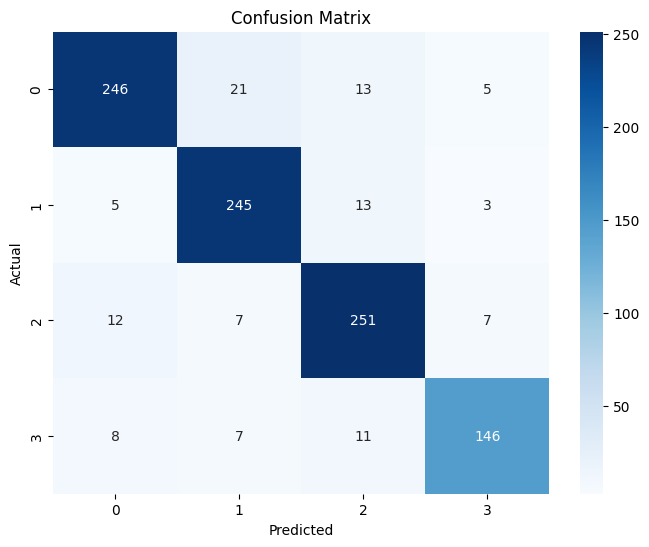

In [ ]:
import seaborn as sns

import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=model.classes_,
            yticklabels=model.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

#Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, Y_train)

rf_pred = rf_model.predict(X_val)

In [ ]:
cm = confusion_matrix(Y_val, rf_pred)
print("Confusion Matrix:\n",cm)
print("\nClassification Report:\n", classification_report(Y_val, X_val_pred))

Confusion Matrix:
 [[266  12   7   0]
 [  8 254   3   1]
 [ 10   2 264   1]
 [  6   5   5 156]]

Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.86      0.88       285
           1       0.88      0.92      0.90       266
           2       0.87      0.91      0.89       277
           3       0.91      0.85      0.88       172

    accuracy                           0.89      1000
   macro avg       0.89      0.88      0.89      1000
weighted avg       0.89      0.89      0.89      1000



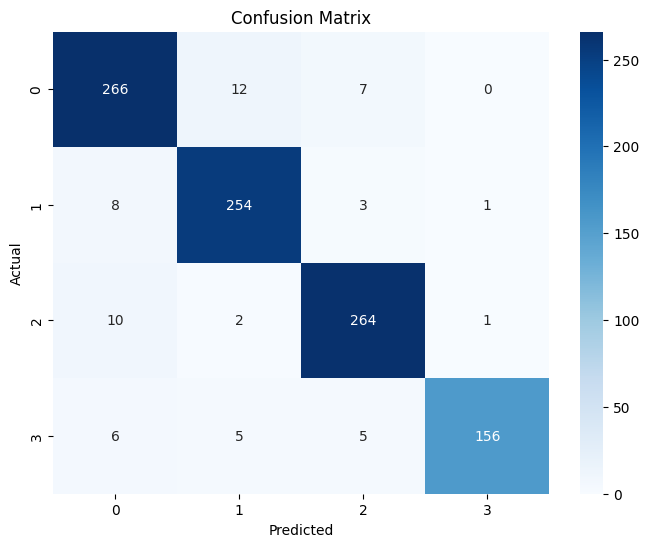

In [ ]:
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=rf_model.classes_,
            yticklabels=rf_model.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

#Saving the model

In [ ]:
import pickle

filename = 'trained_model.sav'
pickle.dump(model, open(filename, 'wb'))

In [ ]:
loaded_model = pickle.load(open("/content/trained_model.sav", 'rb'))
X_new = X_val[300]
print(Y_val[300])

3


In [ ]:
prediction = model.predict(X_new)

if(prediction[0] == 0):
  print("Neutral")
elif(prediction[0] == 1):
  print("Negative")
elif(prediction[0] == 2):
  print("Positive")
else:
  print("Irrelevant")

Irrelevant
